## single tree 

better version of tree.ipynb

In [2]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn import metrics    # contains all the effectivness idexes 
import pandas as pd    # for the dataset
from matplotlib import pyplot as plt
import numpy as np

#### importing and preparing the dataset

In [3]:
labels = ['class', 'spec_number', 'eccentr', 'asp_ratio', 'elong', 'solidity', 'stoch_conv', 'iso_factor', 'max_ind_depth', 'lobedness', 'av_intensity', 'av_contr', 'smooth', 'third_mom', 'unif', 'entropy']

df = pd.read_csv(r'./leaf/leaf.csv', header = None, names = labels)

# shuffling the dataframe
df = df.sample(frac=1).reset_index()
df = df.iloc[:, 1:17]   # needed to eliminate the old indexes column

display(df)

,class,spec_number,eccentr,asp_ratio,elong,solidity,stoch_conv,iso_factor,max_ind_depth,lobedness,av_intensity,av_contr,smooth,third_mom,unif,entropy
0,32,11,0.78676,1.6815,0.41383,0.97686,0.99825,0.76860,0.013524,0.033289,0.016538,0.076334,0.005793,0.001979,0.000071,0.43227
1,23,9,0.60180,1.2254,0.41835,0.94269,0.95263,0.54871,0.058835,0.629990,0.016202,0.074883,0.005576,0.001880,0.000071,0.43769
2,22,2,0.90557,2.3423,0.58487,0.95943,0.97368,0.55537,0.023542,0.100870,0.045897,0.134330,0.017724,0.006676,0.000245,0.99430
3,27,9,0.80310,1.6520,0.40268,0.97695,1.00000,0.79833,0.010883,0.021558,0.046764,0.102270,0.010352,0.002152,0.000741,1.50530
4,14,11,0.88246,2.1000,0.54860,0.96929,0.99825,0.61897,0.007302,0.009704,0.101520,0.197170,0.037420,0.012995,0.000491,2.00940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,27,6,0.81354,1.6924,0.41016,0.99256,1.00000,0.78909,0.004635,0.003910,0.031342,0.096493,0.009225,0.002870,0.000170,1.01710
336,4,4,0.64161,1.3004,0.31556,0.93324,0.97895,0.65487,0.017963,0.058729,0.030897,0.082210,0.006713,0.001468,0.000299,1.23590
337,1,10,0.90631,2.3906,0.58336,0.97683,0.99825,0.66419,0.008402,0.012848,0.007010,0.042347,0.001790,0.000459,0.000028,0.28082
338,35,4,0.91708,2.6498,0.62919,0.98493,1.00000,0.57926,0.006805,0.008429,0.082187,0.168770,0.027693,0.008503,0.000640,1.71570


In [4]:
x = df.iloc[:, 1:16]
y = df.iloc[:, 0]

#### finding best hyper-parameters

In [5]:
# names of all effectivness indexes available in sklearn

# note that roc_auc doesn't work in cv because it is a multiclass classification (we need to specify
# ovo or ovr) and that all roc_auc variants don't work in loocv because the testing sets contain
# only one observation

print(metrics.get_scorer_names())

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 

In [6]:
# using grid search with k-fold CV to find the best hyperparameters and fitting the tree

# best_score non è uguale ad ogni run

k = 5

grid_param = {'criterion': ['gini', 'entropy'], 'min_samples_split': np.array(range(2, 8))}
t_cv = GridSearchCV(tree.DecisionTreeClassifier(), grid_param, cv=k, scoring='roc_auc_ovo')
t_cv.fit(x, y)
print(t_cv.best_params_)
print(t_cv.best_score_)

{'criterion': 'gini', 'min_samples_split': 6}
0.8165038314176245


In [7]:
# using now grid search with loocv

grid_param = {'criterion': ['gini', 'entropy'], 'min_samples_split': np.array(range(2, 8))}
t_loocv = GridSearchCV(tree.DecisionTreeClassifier(), grid_param, cv=LeaveOneOut(), scoring='accuracy')
t_loocv.fit(x, y)
print(t_loocv.best_params_)
print(t_loocv.best_score_)

{'criterion': 'entropy', 'min_samples_split': 4}
0.6411764705882353


#### fitting the trees

In [8]:
t_cv_instance = t_cv.best_estimator_
t_loocv_instance = t_loocv.best_estimator_

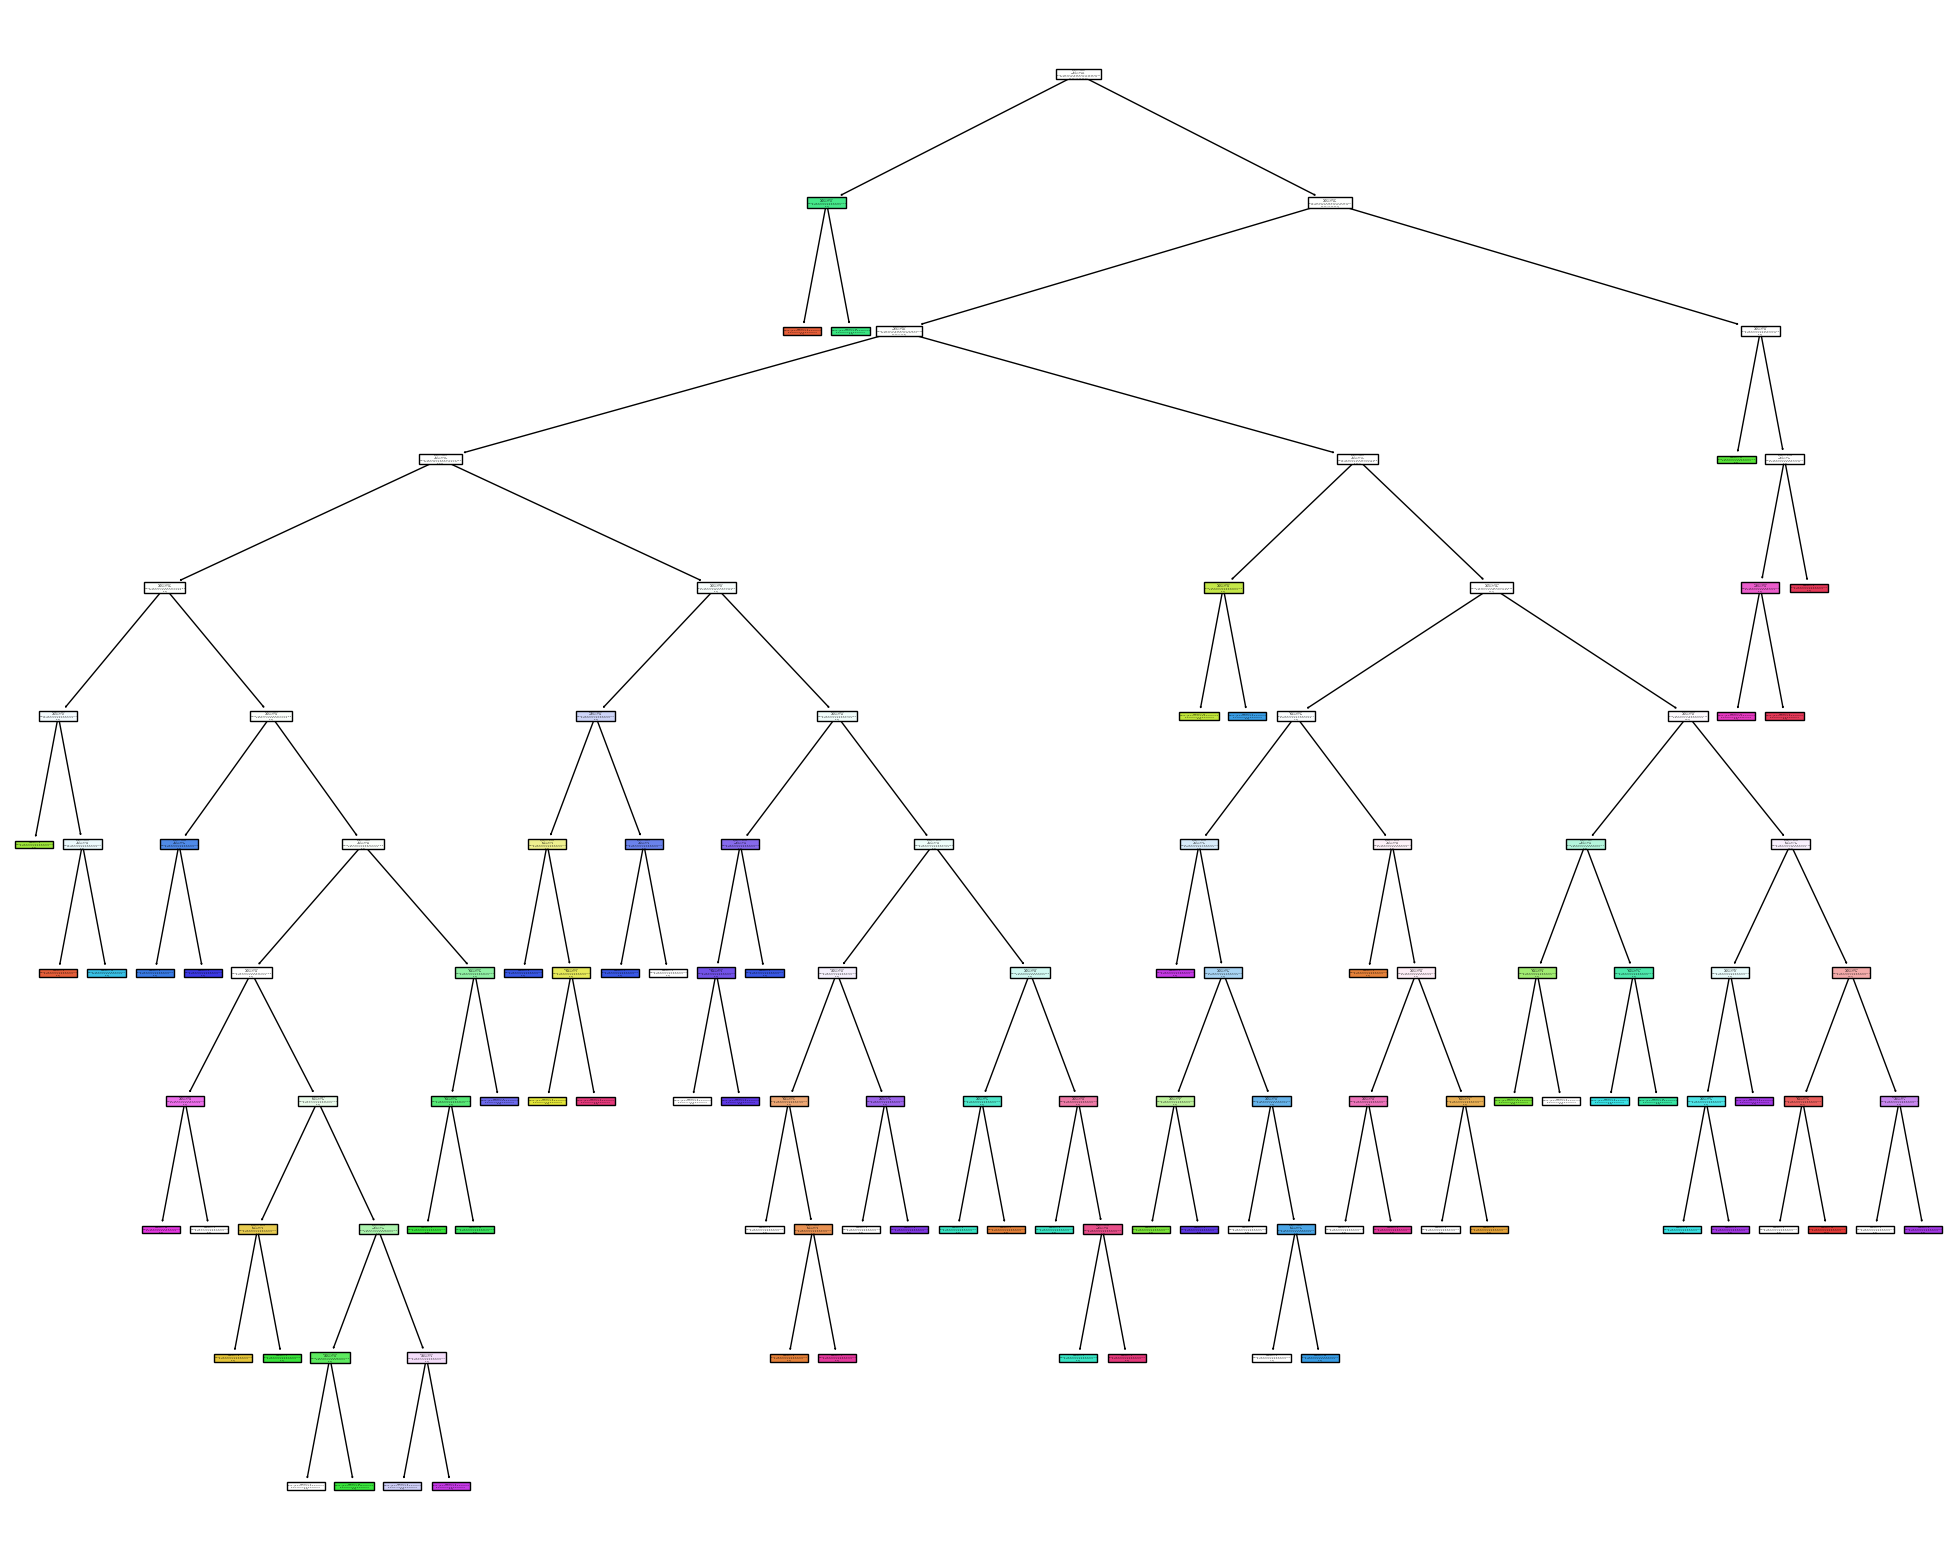

In [9]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(t_cv_instance, filled=True)

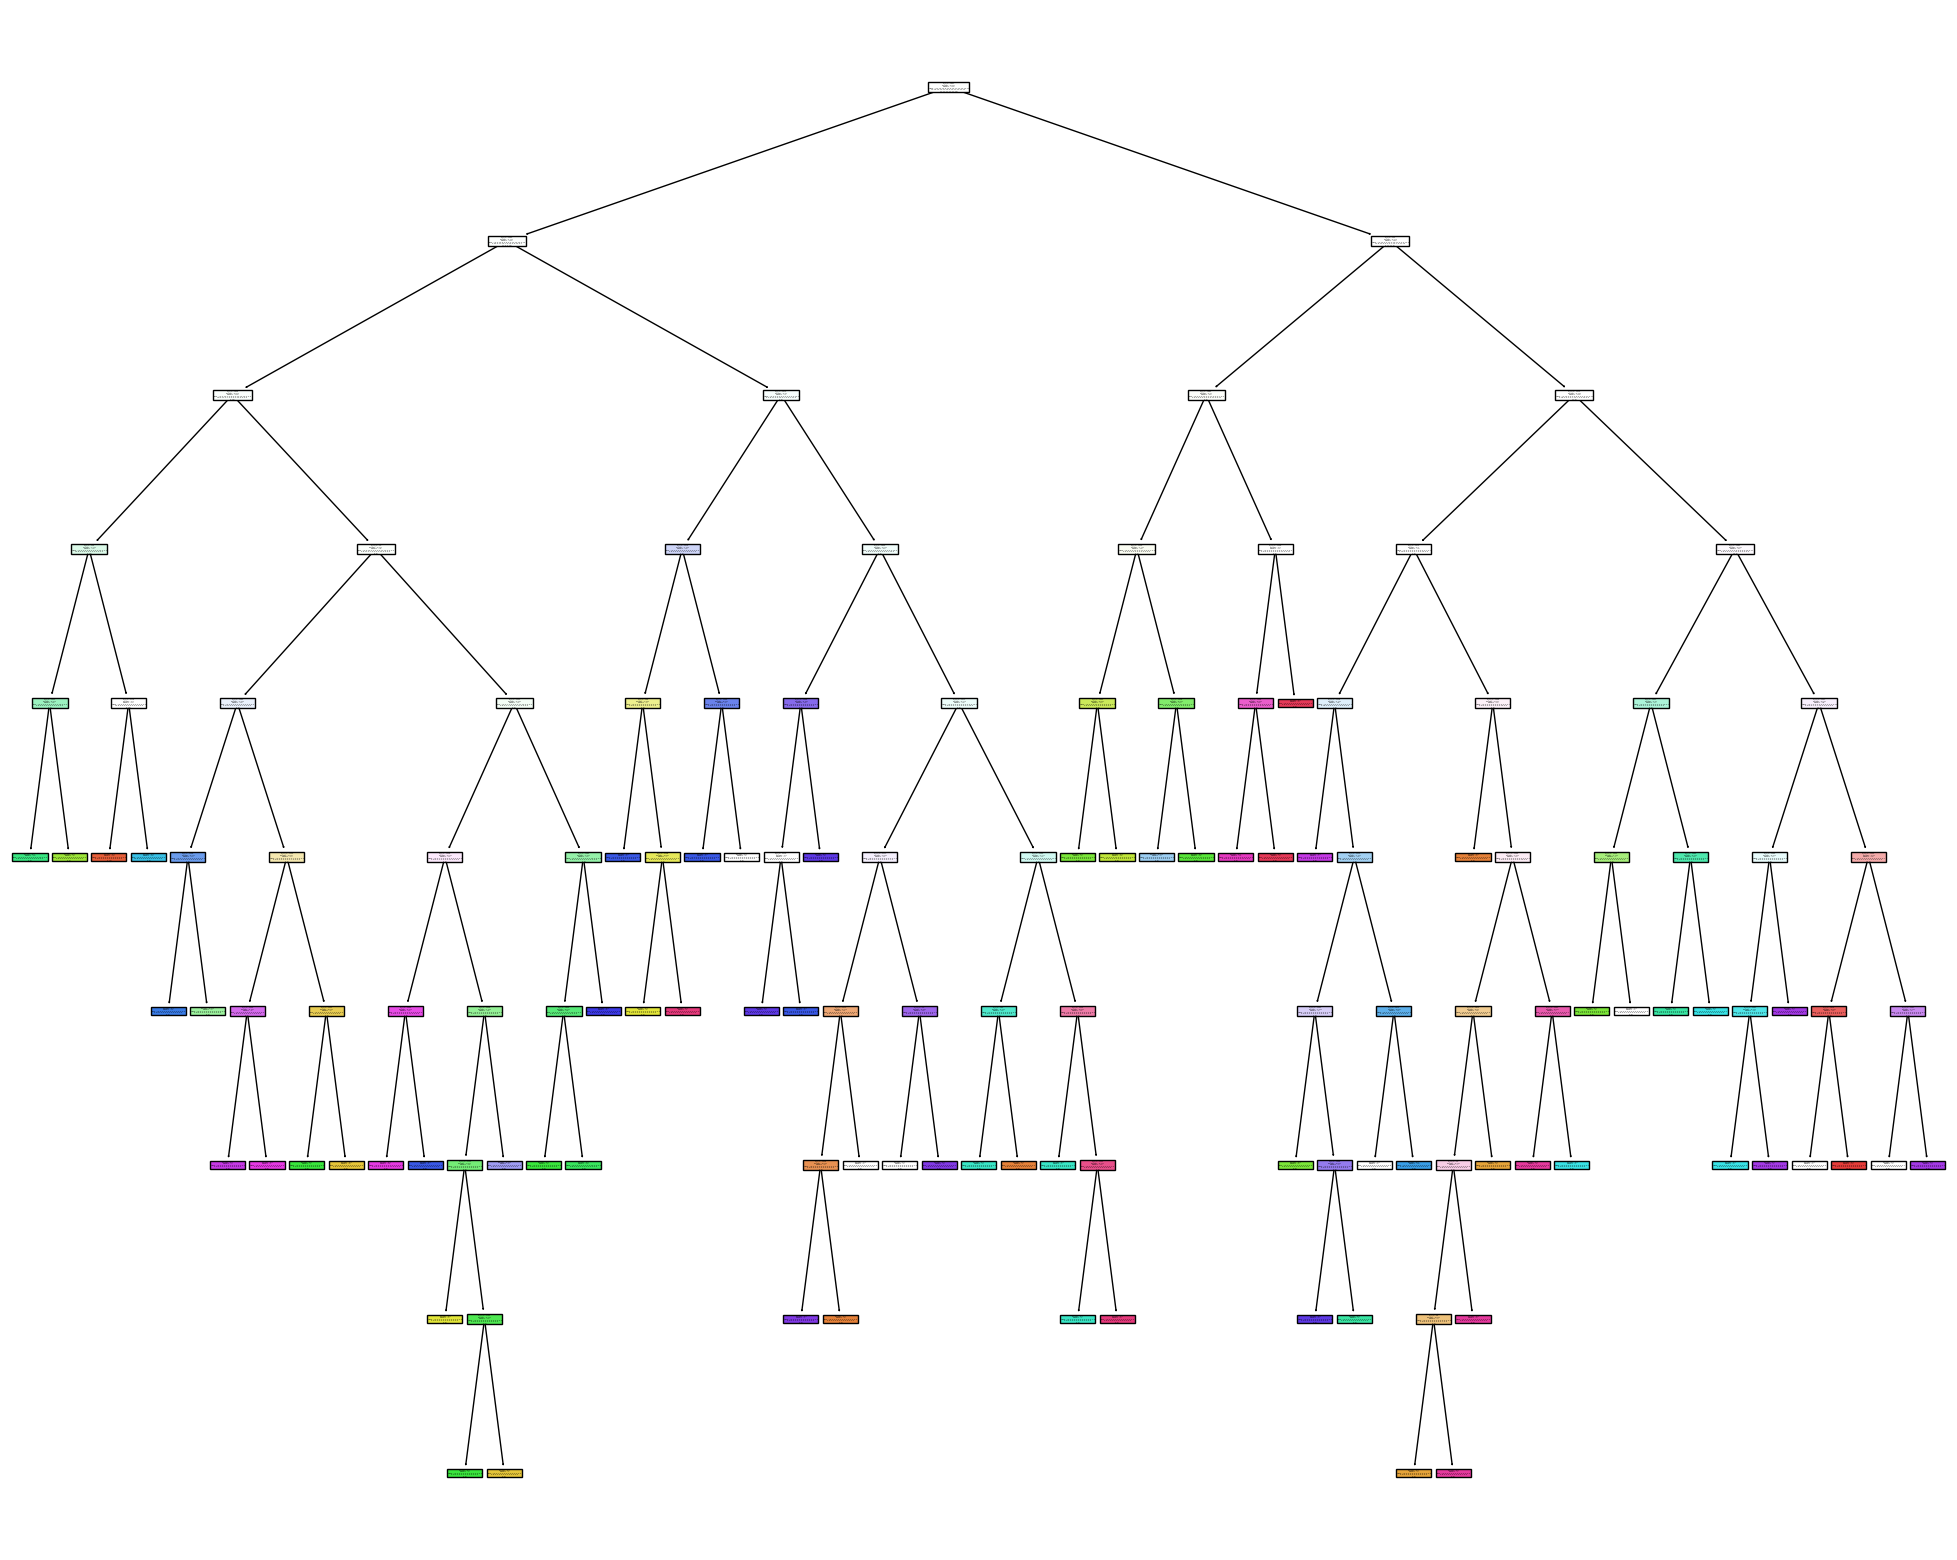

In [10]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(t_loocv_instance, filled=True)

In [11]:
print(type(t_cv_instance))

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
